# Data Scrubbing

First thing I will check is the null values: I will use .isna() for that purpose. Before that, I will delete the id column which I do not need this feature for this project. 

In [8]:
df.drop(['id'], axis=1, inplace=True)

In [9]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The view feature has only 63 missing value, however, waterfront has 2376, and yr_renovated has 3842 null values out of 21597 observations. I will check each one of them individually to see what I can do for those missing values.     

## Null values

### view & waterfront

In [10]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

I have checked the unique values; there are values like 0,1,2,3,4. I first assumed these are the number of times this house was viewed by buyers before a purchase.However it sounds a bit odd to buy a house without viewing at least once. So the other option would be some sort of appealing view is available for this house. Although there is one feature as "waterfront", this could be a general clolumn identifying the houses has some special views  such as forest, city..etc I woudl like to check if there is such relationship between waterfron and view in that term.    

I want to first check if all view values are different than 0 for all of the waterfront values are 1. 


In [11]:
df.view[df['waterfront']==1].value_counts()

4.0    123
3.0     14
2.0      7
1.0      1
Name: view, dtype: int64

In [12]:
df.waterfront[df['view']==0].value_counts()

0.0    17312
Name: waterfront, dtype: int64

There is no 0 in the view when waterfront is 1 and waterfron is always 0 when view is 0 except null values. I can use this information for filling out some of the null values. 
Beacuse it means that when view is 0 then null values in waterfront should be replaced with 0. 

In [13]:
df.waterfront[df['view']==0]=0

/Users/kaan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df.waterfront.isna().sum()

266

This took care of most of the missing values in waterfront. Rest of them is unknown. Lets see how the values are distributed.

/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


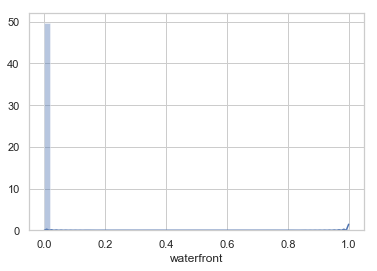

In [15]:
sns.distplot( df[df.waterfront.notna()]['waterfront'] )

The number of 1 values are comparingly too small so I have used distplot to visualise. It wOuld not hurt the convert rest of the null values in to 0 because it would not do any dramatic effect on the result and I can still keep the rest of the data for the other features in those rows.  

In [16]:
df.waterfront=df.waterfront.fillna(0)


Now let's see how the view distirbuted. 

# of missing values in the view column 63


Text(0,0.5,'# of Houses')

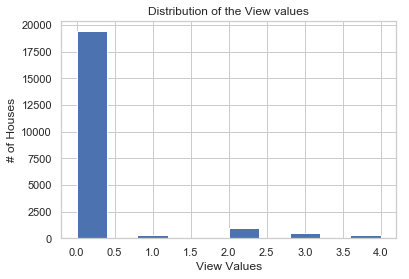

In [17]:
print("# of missing values in the view column", df.view.isna().sum())

df.view.hist()
plt.title("Distribution of the View values")
plt.xlabel("View Values")
plt.ylabel("# of Houses")

Missing values in the view is also small number and the value of "0" is vrey large. I can replace all nul values with "0".

In [18]:
df.view=df.view.fillna(0)
df.view.isna().sum()

0

## yr_renovated

In [19]:
df.yr_renovated.unique()



array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

I would like to cross check this feature and date feature. Because there is already a yr_built for year. So what about date? 


In [20]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Text(0,0.5,'Number of Renovated House')

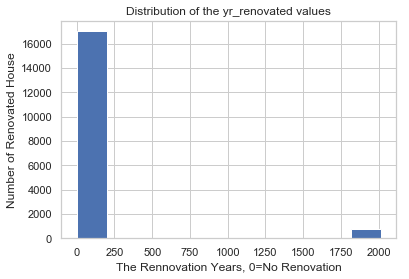

In [21]:
df.yr_renovated.hist()
plt.title("Distribution of the yr_renovated values")
plt.xlabel("The Rennovation Years, 0=No Renovation")
plt.ylabel("Number of Renovated House")

When I compare the values in the same rows, it seems no connection. the date is probably the last date that the house was sold. No luck on yr_renovation. So, since there is no information about renovation for nan values, I will just fill them with "0". Also, the number of renovated house are so small. I was planning to bin those years but, since the number is very small, it will be better to convert this column as renovated or non-renovated. 

In [22]:
df.yr_renovated=df.yr_renovated.fillna(0)
df.yr_renovated[df.yr_renovated!=0]=1
df.yr_renovated.value_counts()


/Users/kaan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.0    20853
1.0      744
Name: yr_renovated, dtype: int64

So far , I took care of all null values in the dataset. Now let me check if there is any place holders. 


## Place holders

I have checked all features' unique values and value counts. There is only one placeholder in sqft_basement. It is the "?". Since it is not a number.I have noticed that sqft_basement feature is object type. I wanted to convert it to float, but because of a string value ("?"), it did not let me to do. To be able replace ? with any number, I need to convert them to NaN. Because that is a value both str and onject category can recognize.

In [23]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [24]:
df.sqft_basement[df.sqft_basement=='?'].count()

454

In [25]:
df['sqft_basement'] = np.where(
    df.sqft_basement.eq('?'), np.NaN, df['sqft_basement'] .str[:-1]
)

In [26]:
df.sqft_basement=df.sqft_basement.astype('float')

My first intention was filling NaN with the mean of this column, however, I wanted to see if there is any  relationship between 'sqft_basement', 'sqft_above', 'sqft_living' features. What I have noticed is sqft_basement is the difference between other two features. So I will replace all sqrt_basement column with this calculation. 

In [27]:
df[['sqft_basement', 'sqft_above', 'sqft_living']].head()

,sqft_basement,sqft_above,sqft_living
0,0.0,1180,1180
1,400.0,2170,2570
2,0.0,770,770
3,910.0,1050,1960
4,0.0,1680,1680


In [28]:
df['sqft_basement'] = df [ 'sqft_living']- df['sqft_above']

In [29]:
df.sqft_basement.value_counts().head()

0      13110
600      221
700      218
500      214
800      206
Name: sqft_basement, dtype: int64

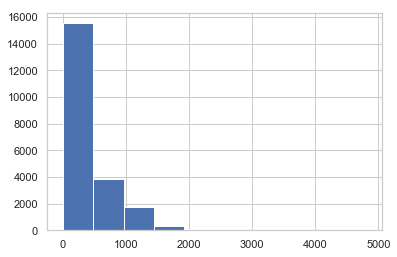

In [30]:
df.sqft_basement.hist()

Large number of 0s skews this feature dramaticaly. I will convert this 1s and 0s. 

In [31]:
df.sqft_basement[df.sqft_basement!=0]=1
#df.sqft_basement.value_counts()

/Users/kaan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Correlation

Before I start label encoding I want to check correlation matrix to see if there is any column that I need to drop.  

In [ ]:
plt.figure(figsize=(12,12))
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, center=0, vmin=0.5, square=True, linewidths=.5, cmap='gist_rainbow')
plt.title('Correlation between features', fontdict={'fontsize': 16})
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()



There is strong correlation between  sqft_above, bathrooms and sqft_living. I will drop sqft_above because sqft_living might be more handy for further analysis

In [ ]:
abs(df.corr()) > 0.75

In [ ]:
df.corr()['price'].sort_values(ascending=False)

The correlation between price and zipcode is negative, so I want to drop zipcode as well. 

In [ ]:
df=df.drop('sqft_above', axis=1)
df=df.drop('grade', axis=1)
df=df.drop('bathrooms', axis=1)
df=df.drop('zipcode', axis=1)

### Binning ( yr_built, lat, long  )

In [54]:
#Binning yr_built
df.yr_built.describe()

built_bins=[1900,1930,1960,1990,2020]
labels=['1900_1930', '1930_1960','1960_1990','1990_2020']
bins_built= pd.cut(df['yr_built'], built_bins , labels=labels )
bins_built = bins_built.cat.as_unordered()
df.yr_built=bins_built


#Binning long
segments = 10
bins = list(np.linspace(df.long.min(), df.long.max(), num=segments))
labels = [i for i in range(1,segments)]
df.long = pd.cut(df.long, bins, labels=labels)


#Binning lat
segments = 10
bins = list(np.linspace(df.lat.min(), df.lat.max(), num=segments))
bins
labels = [i for i in range(1,segments)]
df.lat = pd.cut(df.lat, bins, labels=labels)
 

In [55]:
df.yr_built.unique()

[1930_1960, 1960_1990, 1990_2020, 1900_1930, NaN]
Categories (4, object): [1930_1960, 1960_1990, 1990_2020, 1900_1930]

### Category Types

I will convert nine features to category type. I will put them in to a list and do this task in a loop. 

In [56]:
# floors has decimal values and during hot encoding that will be problem.I first round them to one digit and convert them to int so that I do not have  "." in dummy names.
# It actually happened and I had to come back to this part and fix the problem
df=df.round({'floors': 0})
df.floors=df.floors.astype(int)
df.waterfront=df.waterfront.astype(int)
df.view=df.view.astype(int)

cat_list=['yr_built','condition','long','lat','waterfront','floors','view', 'bedrooms','sqft_basement']

In [57]:
df_cat=pd.DataFrame()
for i in cat_list:
    df_cat[i]=df[i].astype('category')

### One-Hot-Encoding

Using the same list, i will create dummies, add them to the dataframe and drop the original column.

In [58]:
for i in cat_list:
    dummies=pd.get_dummies(df_cat[i],prefix=i, drop_first=True)
    df_cat=df_cat.join(dummies)
    df_cat.drop([i], axis=1, inplace=True)


In [59]:
#check if everything looks ok.
#df_cat.info()
df_cat.head(3)

,yr_built_1930_1960,yr_built_1960_1990,yr_built_1990_2020,condition_2,condition_3,condition_4,condition_5,long_2,long_3,long_4,...,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bedrooms_33,sqft_basement_1
0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Scaling & Normalization

/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


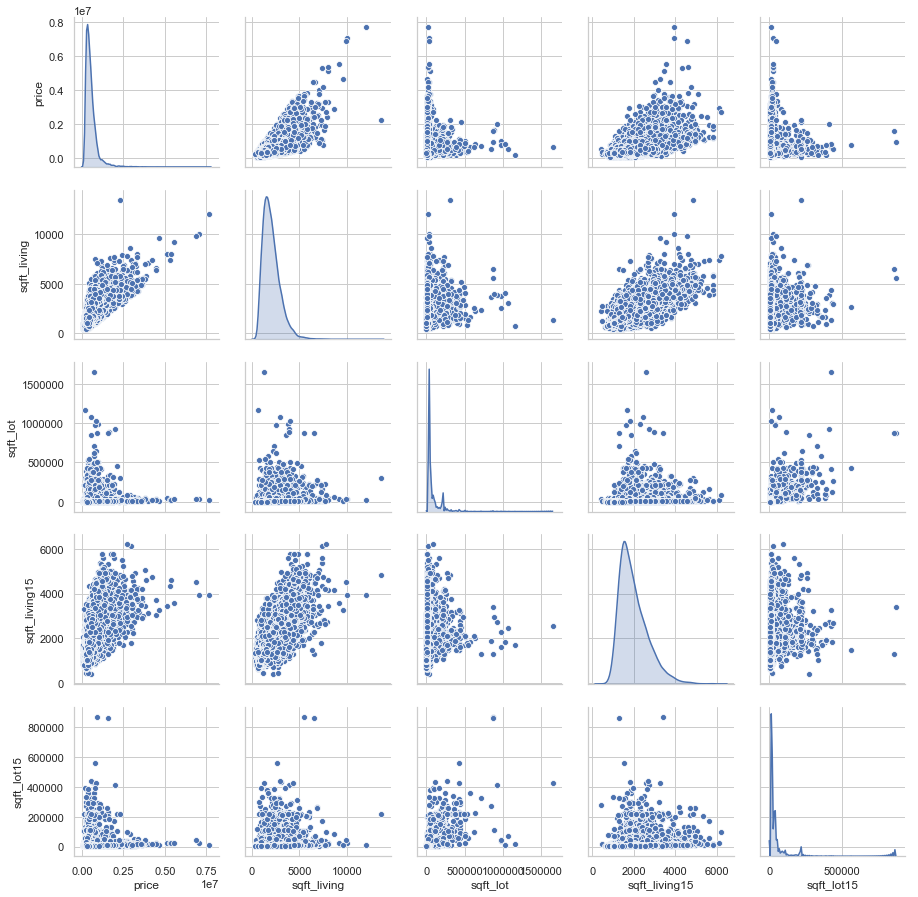

In [60]:
df_cont=df.loc[:,['price','sqft_living','sqft_lot','sqft_living15','sqft_lot15']]
g = sns.pairplot(df_cont, diag_kind="kde")

### Skewed features
I will use quantile transformation from sklearn.preprocessing library for continues features to fix skewness and scaling them. 

In [61]:
from sklearn.preprocessing import quantile_transform

transform = quantile_transform(df_cont[['price','sqft_living','sqft_lot','sqft_living15','sqft_lot15']],
                                    output_distribution = 'normal')

trans_features = pd.DataFrame(transform)
trans_features.columns=['price','sqft_living','sqft_lot','sqft_living15','sqft_lot15']

/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


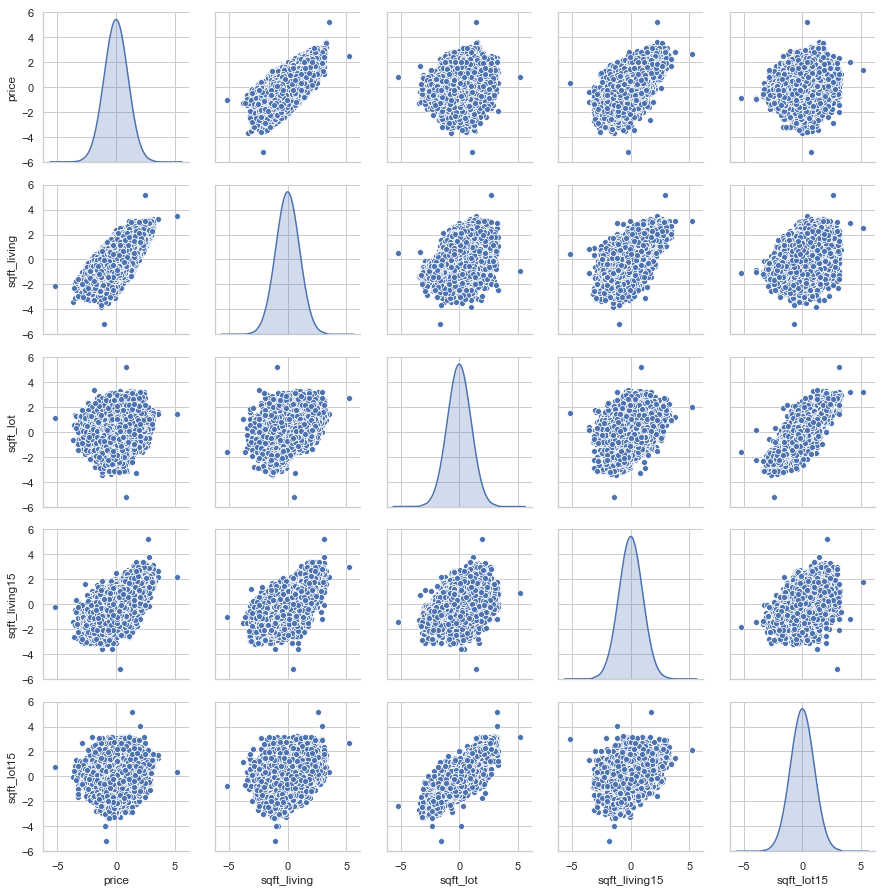

In [62]:
g = sns.pairplot(trans_features, diag_kind="kde")

Now I have a set of fatures that normal distributed. Now I can start modeling. 

In [63]:
trans_features.head()

,price,sqft_living,sqft_lot,sqft_living15,sqft_lot15
0,-1.524727,-1.109378,-0.517790,-1.037937,-0.517790
1,0.325577,0.694311,-0.115464,-0.247134,0.007616
2,-2.013671,-2.131682,0.562796,1.064091,0.154186
3,0.559811,0.051460,-0.718462,-0.985610,-0.744694
4,0.226489,-0.293986,0.128003,-0.062770,-0.040336
